# AbacusCosmos Python Interface Examples

This notebook demonstrates the basic usage of the `AbacusCosmos.Halos` and `AbacusCosmos.Halotools` halo catalog interfaces.

The AbacusCosmos Python package is available here: https://github.com/lgarrison/AbacusCosmos

The catalogs are documented on the data release website: https://lgarrison.github.io/AbacusCosmos/

If you encounter problems with the catalogs/Python code, please [file an issue](https://github.com/lgarrison/AbacusCosmos).  Also be sure to check the [Data Specifications](https://lgarrison.github.io/AbacusCosmos/data_specifications/), as your issue may be covered there.

Author: Lehman Garrison ([@lgarrison](https://github.com/lgarrison))

## [Halos.py](https://github.com/lgarrison/AbacusCosmos/blob/master/AbacusCosmos/Halos.py)

In [1]:
from AbacusCosmos import Halos

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

/home/lgarrison/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Load a single halo Rockstar catalog with particle subsamples:

In [2]:
# The path to the catalog will be different on your system
cat = Halos.make_catalog_from_dir(dirname='/mnt/gosling2/bigsim_products/AbacusCosmos_1100box_products/AbacusCosmos_1100box_00_products/AbacusCosmos_1100box_00_rockstar_halos/z0.300',
                                  load_subsamples=True, load_pids=False)
halos = cat.halos
halo_1000 = halos[1000]
subsamples = cat.subsamples

In [3]:
for field in sorted(halo_1000.dtype.fields):
    print(field, ':', halo_1000[field])

A : [53.04891   5.399098 -9.398761]
A2 : [39.850292  6.907639 -7.766779]
J : [-1.9693516e+13  2.7946513e+13 -1.4426672e+13]
N : 155
N_SO : 983
Voff : 29.62147
Xoff : 22.592842
alt_N : [135 121  91  29]
alt_N_SO : [983 983 983  48]
alt_m : [5.0370770e+12 4.5147137e+12 3.3953630e+12 1.0820388e+12]
alt_m_SO : [3.6677385e+13 3.6677385e+13 3.6677385e+13 1.7909607e+12]
b_to_a : 0.46212736
b_to_a2 : 0.38154382
bulkvel : [ -663.75305    93.82869 -1657.28   ]
bullock_spin : 0.07133085
c_to_a : 0.33044723
c_to_a2 : 0.27497157
child_r : 0.43996406
corevel : [ -682.8728    108.45962 -1700.5497 ]
desc : 0
energy : -9.7564e+16
flags : 25
halfmass_radius : 154.01212
id : 298710
kin_to_pot : 0.7260747
klypin_rs : 49.53651
m : 5783311000000.0
m_SO : 36677385000000.0
m_pe_b : 5295078600000.0
m_pe_d : 3507298200000.0
mgrav : 4775895600000.0
min_bulkvel_err : 984.3729
min_pos_err : 0.00025078392
min_vel_err : 1050.1628
n_core : 98
num_child_particles : 206
num_p : 206
p_start : 73900406
parent_id : 298727

The subsample particles should be near the halo location of `[426.93628   15.228214 237.38449 ]`, and indeed they are:

In [4]:
particles_for_halo_1000 = subsamples[halo_1000['subsamp_start']:halo_1000['subsamp_start']+halo_1000['subsamp_len']]
print(particles_for_halo_1000['pos'])

[[426.9143     15.245714  237.90285  ]
 [427.37714    15.368571  237.59572  ]
 [427.23428    15.095714  237.58429  ]
 [426.94427    15.0671425 237.53714  ]
 [426.8857     15.225714  237.47571  ]
 [426.9057     15.158571  237.44286  ]
 [426.75427    15.267143  237.44142  ]
 [427.12286    15.108572  237.42     ]
 [427.1643     15.288571  237.35858  ]
 [426.79858    15.330001  237.34572  ]
 [426.9586     15.265714  237.34143  ]
 [426.9943     15.207143  237.32713  ]
 [426.67285    15.554285  237.28142  ]
 [426.94858    15.187143  237.28     ]
 [427.09717    15.387142  237.17857  ]
 [426.53857    15.372857  237.11143  ]
 [426.64716    15.35      236.78427  ]
 [427.06       15.085714  236.72856  ]]


### Filter out subhalos:

Note that the above halo is actually a subhalo since its `parent_id` is not `-1`.  Let's see what fraction of Rockstar halos are actually subhalos:

In [5]:
(halos['parent_id'] != -1).mean()

0.09474006531180443

So about 10% are subhalos.  For some analyses you might want to only include top-level parent halos, since Rockstar halo masses always include substructure mass:

In [6]:
print('# halos before subhalo filtering:', len(halos))
halos = halos[halos['parent_id'] == -1]
print('# halos after subhalo filtering:', len(halos))

# halos before subhalo filtering: 9565499
# halos after subhalo filtering: 8659263


### Load all redshifts of a FoF catalog:

In [7]:
cats_by_z = Halos.make_catalogs(sim_name='emulator_1100box_planck_00',
                                products_dir='/mnt/gosling2/bigsim_products/emulator_1100box_planck_products/',
                                redshifts='all', load_phases=False, load_subsamples=False, halo_type='FoF')

We can plot the evolution of the halo mass function with redshift:

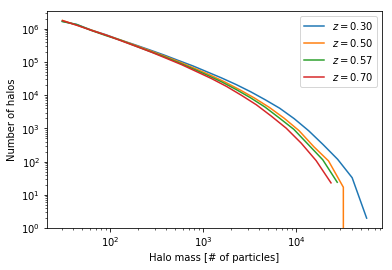

In [8]:
fig, ax = plt.subplots()
for z in sorted(cats_by_z.keys()):
    cat = cats_by_z[z]
    bin_edges, bin_centers, hist = Halos.halo_mass_hist(cat.halos[0]['N'])
    ax.loglog(bin_centers, hist, label='$z = {:.2f}$'.format(z))
ax.set_xlabel('Halo mass [# of particles]')
ax.set_ylabel('Number of halos')
ax.legend()

## [Halotools.py](https://github.com/lgarrison/AbacusCosmos/blob/master/AbacusCosmos/Halotools.py)

In [9]:
from AbacusCosmos import Halotools
import halotools

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Load two different cosmologies at redshift 0.1:

In [10]:
cats = Halotools.make_catalogs(sim_name='AbacusCosmos_720box', cosmologies=[0,1], redshifts=0.1,
                                products_dir='/mnt/gosling2/bigsim_products/AbacusCosmos_720box_products/',
                                phases=None, halo_type='Rockstar', load_halo_ptcl_catalog=False)

Generate mock galaxy catalogs for both:

In [11]:
for cat in cats:
    # First apply an arbitrary mass cut to make the example run faster
    cat.halo_table = cat.halo_table[cat.halo_table['halo_N'] >= 100]
    # Make an approximate concentration column for mock purposes
    cat.halo_table['halo_conc'] = cat.halo_table['halo_rvir'] / cat.halo_table['halo_klypin_rs']

In [12]:
from halotools.empirical_models import PrebuiltHodModelFactory
models = []
for cat in cats:
    model = PrebuiltHodModelFactory('zheng07', redshift=cats[0].redshift, concentration_key='halo_conc')
    model.populate_mock(cat)
    models += [model]

Compute the 2PCF on the mock galaxies:

In [13]:
import Corrfunc
bins = np.logspace(-1,1.5,25)
bin_centers = (bins[:-1] + bins[1:])/2.
tpcfs = []
for model in models:
    gals = model.mock.galaxy_table
    results = Corrfunc.theory.xi(X=gals['x'], Y=gals['y'], Z=gals['z'],
                            boxsize=model.mock.BoxSize, nthreads=4,
                            binfile=bins)
    tpcfs += [results]

Text(0,0.5,'$\\xi(s)$')

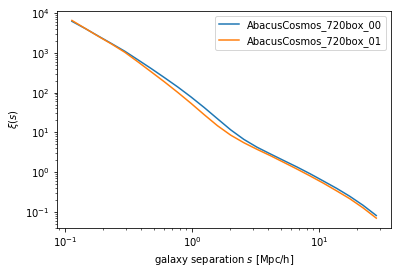

In [14]:
plt.loglog(bin_centers, tpcfs[0]['xi'], label=cats[0].SimName)
plt.loglog(bin_centers, tpcfs[1]['xi'], label=cats[1].SimName)
plt.legend()
plt.xlabel(r'galaxy separation $s$ [Mpc/h]')
plt.ylabel(r'$\xi(s)$')

### Print the particle subsamples for the 1000th halo in the second cosmology:

In [15]:
cats = Halotools.make_catalogs(sim_name='AbacusCosmos_720box', cosmologies=[0,1], redshifts=0.1,
                                products_dir='/mnt/gosling2/bigsim_products/AbacusCosmos_720box_products/',
                                phases=None, halo_type='Rockstar', load_halo_ptcl_catalog=True)

In [16]:
halos = cats[1].halo_table
subsamples = cats[1].halo_ptcl_table
i = 999

In [17]:
halos[i]

halo_id,halo_corevel [3],halo_bulkvel [3],halo_m_SO,halo_child_r,halo_vmax_r,halo_mgrav,halo_vmax,halo_rvmax,halo_rs,halo_klypin_rs,halo_vrms,halo_J [3],halo_energy,halo_spin,halo_alt_m [4],halo_alt_m_SO [4],halo_Xoff,halo_Voff,halo_b_to_a,halo_c_to_a,halo_A [3],halo_b_to_a2,halo_c_to_a2,halo_A2 [3],halo_bullock_spin,halo_kin_to_pot,halo_m_pe_b,halo_m_pe_d,halo_halfmass_radius,halo_num_p,halo_num_child_particles,halo_p_start,halo_desc,halo_flags,halo_n_core,halo_subsamp_start,halo_subsamp_len,halo_min_pos_err,halo_min_vel_err,halo_min_bulkvel_err,halo_N,halo_alt_N [4],halo_N_SO,halo_alt_N_SO [4],halo_mvir,halo_rvir,halo_x,halo_y,halo_z,halo_vx,halo_vy,halo_vz,halo_upid,halo_hostid
int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int64,int64,float32,float32,float32,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64
569976,-152.74799 .. -599.93256,-152.74799 .. -599.93256,9653903000000.0,0.00027807892,0.26705223,918326100000.0,195.09929,0.034244202,0.013399579,0.013399579,203.21617,-592084000000.0 .. 550002360000.0,-7822789500000000.0,0.02085905,918326100000.0 .. 390288570000.0,9653903000000.0 .. 528037500000.0,13.82113,18.201519,0.6558509,0.51455605,-1.9109313 .. 25.46689,0.9471713,0.59796464,14.867451 .. -12.681051,0.023405345,0.7082647,1339113500000.0,390288570000.0,0.059088998,207,207,32769850,0,25,53,50850,17,4.5048728e-05,751.38617,751.38617,126,80 .. 34,841,841 .. 46,1446363500000.0,0.20255421,31.882689,45.794632,145.67741,-152.74799,859.7607,-599.93256,569974,569974


In [18]:
subsamples[halos['halo_subsamp_start'][i]:halos['halo_subsamp_start'][i] + halos['halo_subsamp_len'][i]]

x,y,z,vx,vy,vz,pid
float32,float32,float32,float32,float32,float32,int64
31.57621,46.07626,145.95335,-469.4303,693.1775,-122.841576,1637243587
31.929663,45.918232,145.87573,-362.6751,732.6623,-49.72159,1620647597
31.866077,45.79948,145.8,-356.45993,859.6168,-504.5279,1622709673
31.878233,46.225872,145.76727,-213.51036,829.18066,-650.7679,1628931922
31.874493,45.611534,145.7364,-301.61993,885.6658,-222.10194,1631011277
32.07366,45.440414,145.7093,-425.00992,585.4169,-160.40697,1612335919
31.868883,46.23335,145.69434,-276.39355,731.1998,-451.8815,1616498956
31.79782,45.83595,145.68967,-87.74398,830.643,-365.5999,1631009831
31.902546,45.819115,145.66815,-235.44635,1061.7021,-548.3999,1628939112
